# Imports


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


# Load the Fashion MNIST dataset

contains 70,000 grayscale images in 10 categories

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:
  - train_images, train_labels are the training set
  - test_images, test_labels are the test set
  
images have a 28 x 28 size with pixel values from 0 to 255.
Labels are an array of integers, ranging from 0 to 9.
Each image is mapped to a single name, we have to define the class names:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Briefly Explore the data

In [4]:
# training set shape:
print('Training set image dimension:',str(train_images.shape))
print('Training set label dimension:',str(train_labels.shape))

# test set shape:
print('Test set image dimension:',str(test_images.shape))
print('Test set label dimension:',str(test_labels.shape))

Training set image dimension: (60000, 28, 28)
Training set label dimension: (60000,)
Test set image dimension: (10000, 28, 28)
Test set label dimension: (10000,)


# Data preprocessing

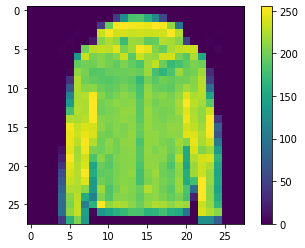

In [5]:
# Inspect one image
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()
plt.grid(False)
plt.show()


before feeding the data to the neural network model, we want to normalize them in a range of 0 to 1.

In [6]:
train_images = train_images / train_images.max()

test_images = test_images / train_images.max()


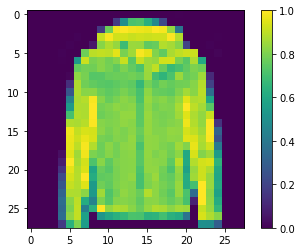

In [7]:
# Let's show new range
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()
plt.grid(False)
plt.show()

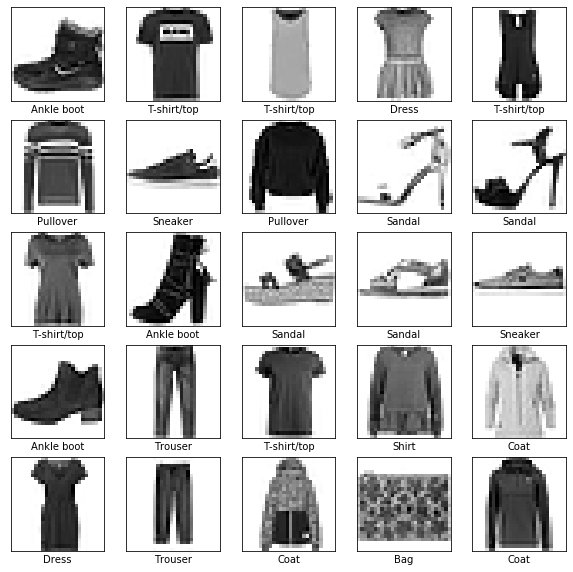

In [8]:
# Let's show the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

In [9]:
# Keras sequential model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [36]:
# Let's show the architecture of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile the model
during this step we need to select a few settings:
    
    - Loss function: measures how the model is accurate 
      during training (is what we want to minimize)
    - Optimizer: how the model is updated based on the data 
      that it sees and loss function
    - Metrics: Used to monitor training and testing steps: 
      Accuracy fraction of correctly classified images
      
      \\Accuracy = \frac{correctly classified images}{Numer images}\\
      


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model


To train the neural network model, we need to follow these steps:

    - 1. Feed training data to the model
    
    - 2. Model hopefully learns to associate images and labels

    - 3. Test model predictions on an "unseen" test set and verify accuracy
    
to train the data we will call the method model.fit

In [15]:
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4997 - acc: 0.8249
Epoch 2/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3744 - acc: 0.8662
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3348 - acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3102 - acc: 0.8856
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2919 - acc: 0.8921
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2796 - acc: 0.8957
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2667 - acc: 0.9002
Epoch 8/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2551 - acc: 0.9054
Epoch 9/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2441 - acc: 0.9095
Epoch 10/10
60000/60000 [==============================] - 

# Evaluate Accuracy

In [19]:
# Check how model performs on test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 56.3698 - acc: 0.8723

Test accuracy: 0.8723


# Make Predictions

In [22]:
# Predictions over test set
predictions = model.predict(test_images)

In [31]:
# Show result
img_idx = 0 # Idx of image
print('Model output:',predictions[img_idx])
print('Predicted label:', np.argmax(predictions[img_idx]))
print('Ground truth label:',test_labels[img_idx])

Model output: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted label: 9
Ground truth label: 9


In [34]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

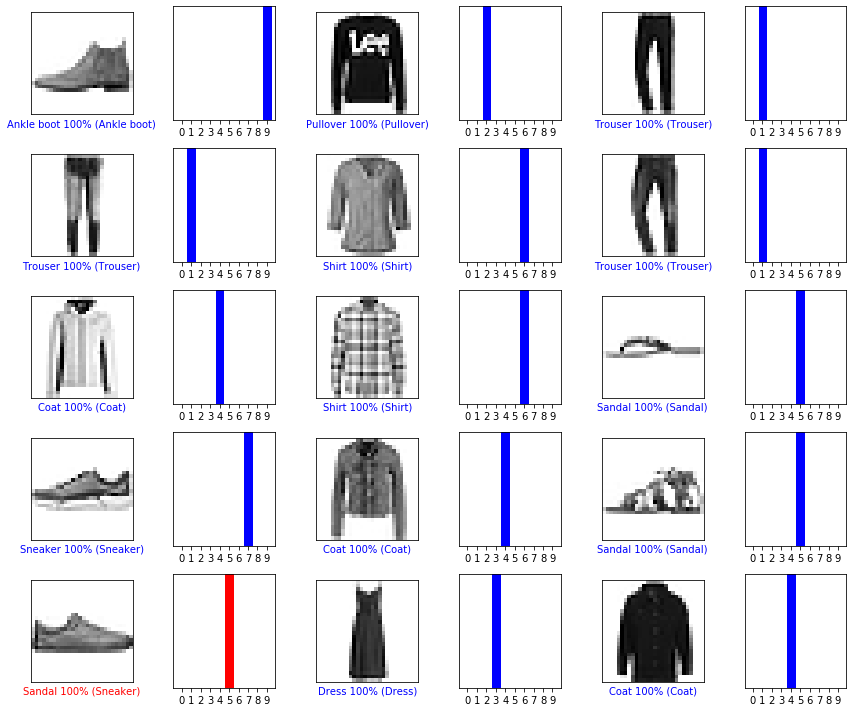

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [41]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [20]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE